# <u>Partie 1.2:</u> Visualisation des données

<b><u>Auteurs</u> :</b> Eytan Levy, Guillaume Surleau et Manitas Bahri  
<b><u>Date</u> :</b> Mars 2023

In [2]:
# Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Définit le chemin du répertoire parent
import sys
sys.path.append("../")

# Custom packages
from py_scripts import pre_processing as pp
from py_scripts.utils import *


In [3]:
# Pour afficher toutes les collones et lignes de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [4]:
# Charge la base de donnée
DATASET, _, _ = pp.load_preproc_dataset(ratio_test=0, rescaled=False)


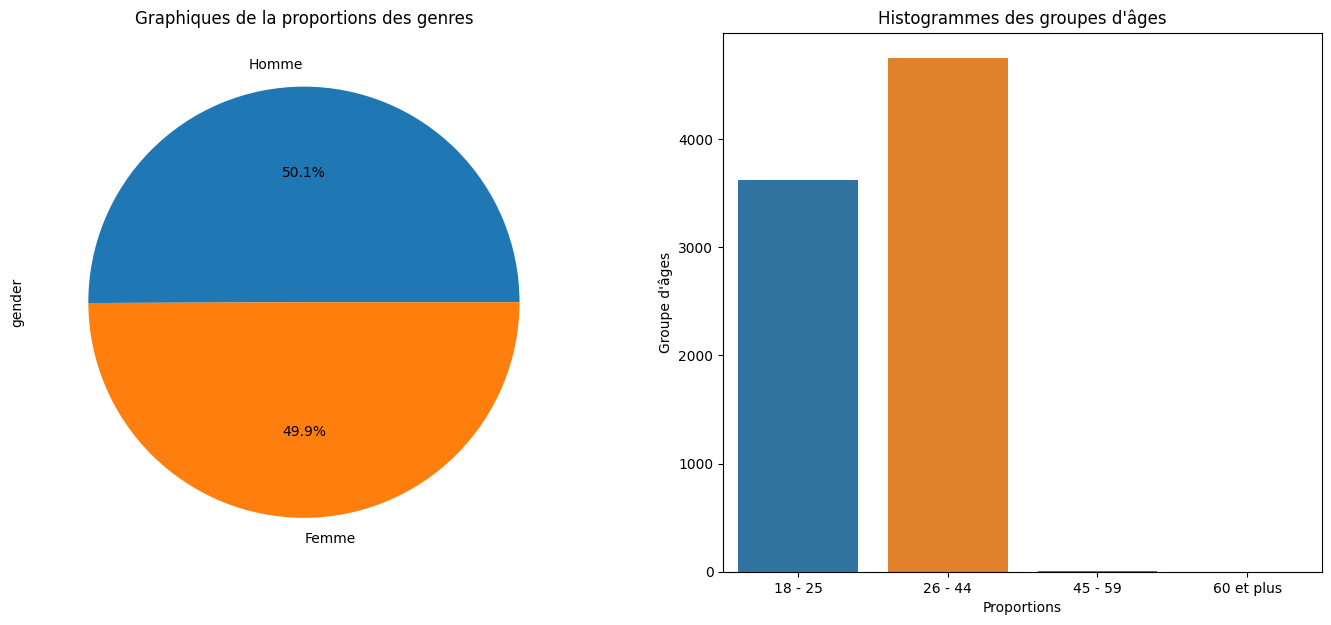

In [5]:
plt.figure(figsize=(17, 7))
args = {"kind": "pie", "autopct": "%.1f%%"}

# Proportion des genres.
plt.subplot(121)
plt.title("Graphiques de la proportions des genres")
lbl_gender = ["Homme", "Femme"]
DATASET["gender"].value_counts().plot(**args, labels=lbl_gender)

# Proportion des âges.
g1 = DATASET[(DATASET["age"] >= 18) & (DATASET["age"] <= 25)]
g2 = DATASET[(DATASET["age"] >= 26) & (DATASET["age"] <= 44)]
g3 = DATASET[(DATASET["age"] >= 45) & (DATASET["age"] <= 59)]
g4 = DATASET[(DATASET["age"] >= 60)]

groups_age = {"18 - 25": len(g1), "26 - 44": len(g2),
              "45 - 59": len(g3), "60 et plus": len(g4)}

plt.subplot(122)
sns.barplot(x=list(groups_age.keys()), y=list(groups_age.values()))
plt.xlabel("Proportions")
plt.ylabel("Groupe d'âges")
plt.title("Histogrammes des groupes d'âges")

plt.show()


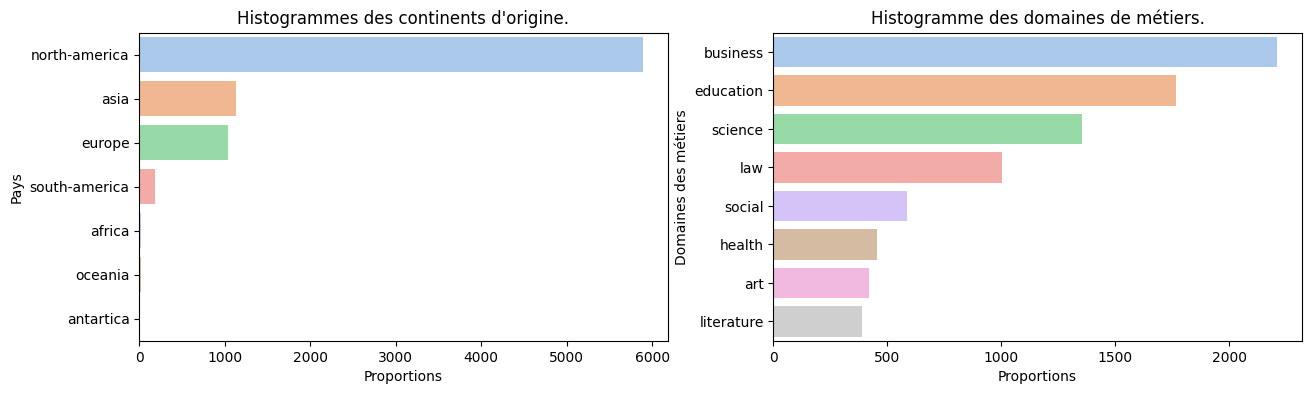

In [45]:
lbl_from, val_from = count_multiple_columns(DATASET, "from_")
lbl_career, val_career = count_multiple_columns(DATASET, "career_")

plt.figure(figsize=(15, 4))

# Graphique des pays
plt.subplot(121)
sns.barplot(x=lbl_from, y=val_from, palette="pastel")
plt.xlabel("Proportions")
plt.ylabel("Pays")
plt.title("Histogrammes des continents d'origine.")

# Graphique des personnes
plt.subplot(122)
sns.barplot(x=lbl_career, y=val_career, palette="pastel")
plt.xlabel("Proportions")
plt.ylabel("Domaines des métiers")
plt.title("Histogramme des domaines de métiers.")
plt.show()


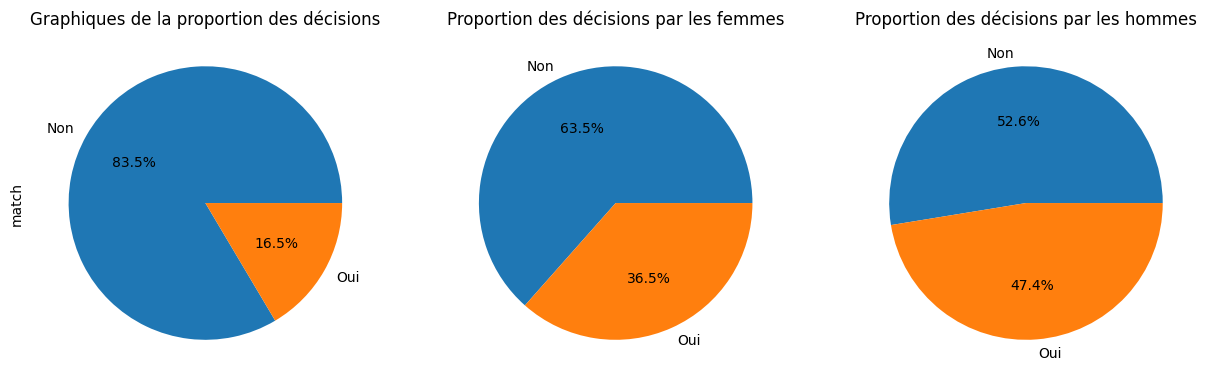

In [7]:
decision = DATASET.groupby("gender")["decision"].value_counts()
woman_decision, man_decision = decision[0], decision[1]
lbl_yesno = ["Non", "Oui"]

plt.figure(figsize=(15, 7))

# Proportion de match
plt.subplot(131)
plt.title("Graphiques de la proportion des décisions")
DATASET["match"].value_counts().plot(**args, labels=lbl_yesno)

plt.subplot(132)
plt.pie(x=woman_decision, labels=lbl_yesno, autopct="%.1f%%")
plt.title("Proportion des décisions par les femmes")

plt.subplot(133)
plt.pie(x=man_decision, labels=lbl_yesno, autopct="%.1f%%")
plt.title("Proportion des décisions par les hommes")

plt.show()


In [8]:
DATASET.drop(columns=["p_decision", "decision"], inplace=True)


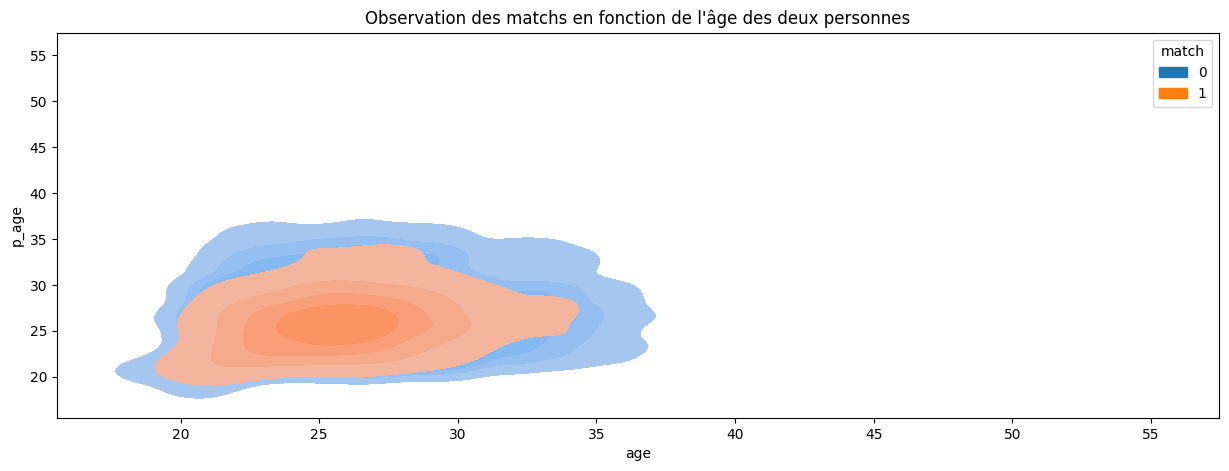

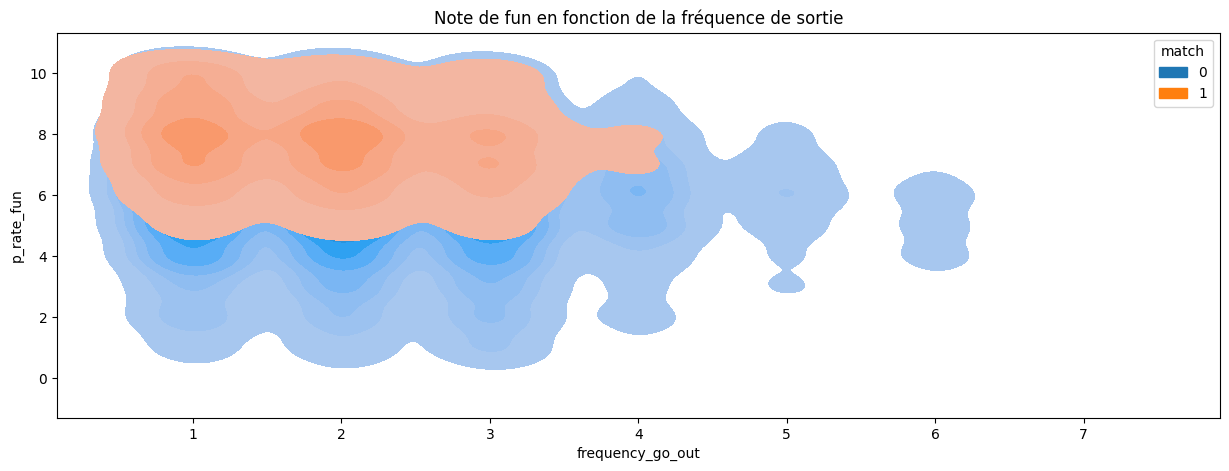

In [53]:
# Figure 1
fig, ax1 = plt.subplots(figsize=(15, 5))
sns.kdeplot(data=DATASET, x="age", y="p_age",hue='match', fill=True, ax=ax1)
ax1.set_title("Observation des matchs en fonction de l'âge des deux personnes")

# Figure 2
fig, ax2 = plt.subplots(figsize=(15, 5))
sns.kdeplot(data=DATASET, x="frequency_go_out", y="p_rate_fun",hue='match',fill=True, ax=ax2)
ax2.set_title("Note de fun en fonction de la fréquence de sortie")

plt.show()

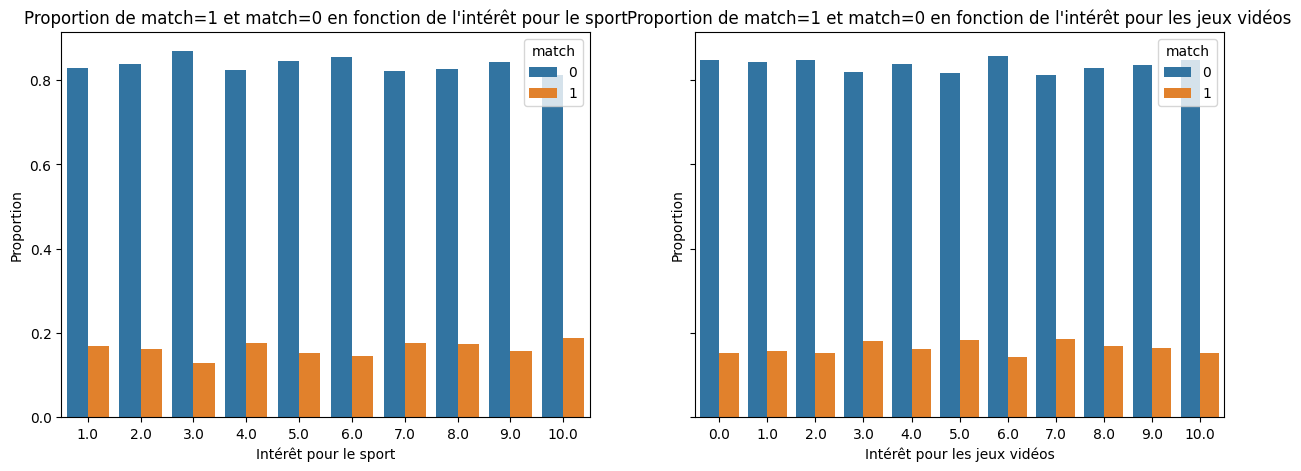

In [10]:
# Création d'une nouvelle colonne pour chaque variable avec le niveau d'intérêt arrondi à l'entier le plus proche
DATASET["interest_sports_rounded"] = DATASET["sports"].round()
DATASET["interest_gaming_rounded"] = DATASET["interest_gaming"].round()

# Calcul des proportions de match=1 et match=0 pour chaque niveau d'intérêt arrondi
interest_counts = DATASET.groupby(["interest_sports_rounded", "match"]).size().reset_index(name="count")
interest_counts["proportion"] = interest_counts["count"] / interest_counts.groupby("interest_sports_rounded")["count"].transform("sum")

gaming_counts = DATASET.groupby(["interest_gaming_rounded", "match"]).size().reset_index(name="count")
gaming_counts["proportion"] = gaming_counts["count"] / gaming_counts.groupby("interest_gaming_rounded")["count"].transform("sum")

# Affichage en graphique en barres empilées
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.barplot(data=interest_counts, x="interest_sports_rounded", y="proportion", hue="match", ax=ax1)
ax1.set_xlabel("Intérêt pour le sport")
ax1.set_ylabel("Proportion")
ax1.set_title("Proportion de match=1 et match=0 en fonction de l'intérêt pour le sport")

sns.barplot(data=gaming_counts, x="interest_gaming_rounded", y="proportion", hue="match", ax=ax2)
ax2.set_xlabel("Intérêt pour les jeux vidéos")
ax2.set_ylabel("Proportion")
ax2.set_title("Proportion de match=1 et match=0 en fonction de l'intérêt pour les jeux vidéos")

plt.show()

Text(0.5, 1.0, 'Observation of the matching rate according to careers')

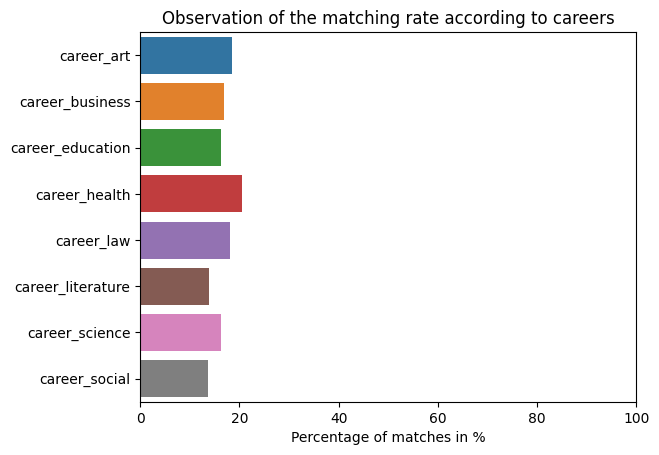

In [11]:
careers = ['career_art', 'career_business', 'career_education', 'career_health',
           'career_law', 'career_literature', 'career_science', 'career_social']

# Dictionnaire pour stocker les ratios de match pour chaque carrière
ratios = {}

# Calculer les ratios de match pour chaque carrière
for career in careers:
    df_career = DATASET[DATASET[career] == 1]
    ratio = np.sum(df_career['match'] == 1) * 100 / len(df_career)
    ratios[career] = ratio

# Afficher les résultats
ratios = list(ratios.values())
careers = ['career_art','career_business','career_education','career_health','career_law','career_literature','career_science','career_social']
sns.barplot(x=ratios, y=careers)
plt.xlim(0,100)
plt.xlabel("Percentage of matches in %")
plt.title("Observation of the matching rate according to careers")

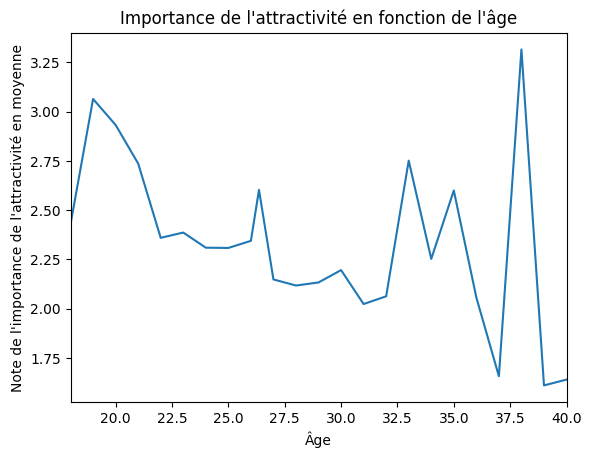

In [12]:
# Calculer la moyenne de exp_relation pour chaque âge
age_exp_relation = DATASET.groupby('age')['p_important_attractive'].mean()

# Créer un graphique linéaire
fig, ax = plt.subplots()
ax.plot(age_exp_relation.index, age_exp_relation.values)
ax.set_xlabel('Âge')
ax.set_ylabel('Note de l\'importance de l\'attractivité en moyenne')
ax.set_title('Importance de l\'attractivité en fonction de l\'âge')
ax.set_xlim(18,40)

plt.show()

Balancing Data

In [13]:
X = DATASET.drop(['match'], axis=1)
y = DATASET['match']

Text(0.5, 1.0, 'Match / No Match in %')

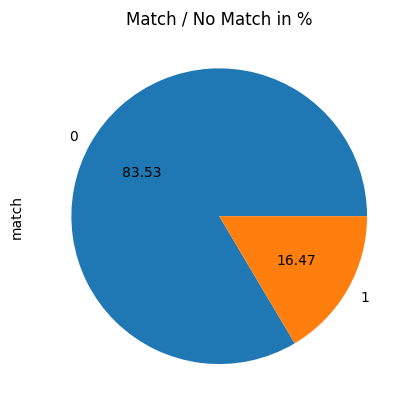

In [14]:
y.value_counts().plot.pie(autopct="%.2f")
plt.title("Match / No Match in %")

Random undersampling

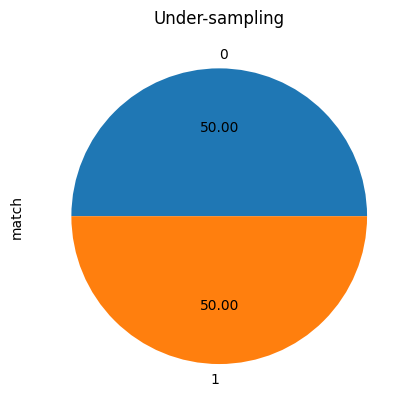

In [15]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")
     

In [16]:
# Class distribution
y_res.value_counts()

0    1380
1    1380
Name: match, dtype: int64

Random oversampling

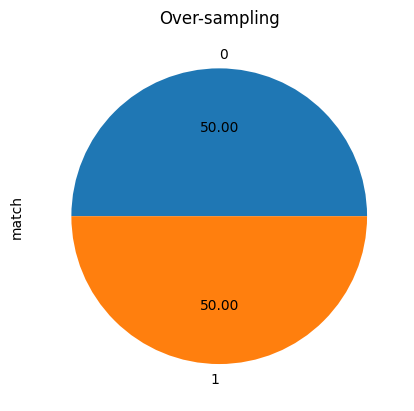

In [17]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [18]:
y_res.value_counts()

0    6998
1    6998
Name: match, dtype: int64

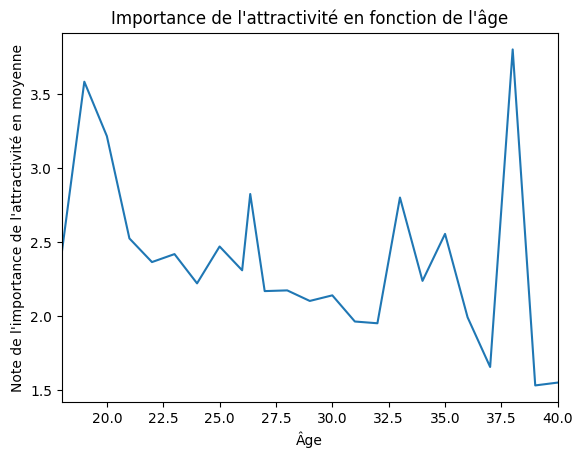

In [19]:
# Calculer la moyenne de exp_relation pour chaque âge
age_exp_relation = X_res.groupby('age')['p_important_attractive'].mean()

# Créer un graphique linéaire
fig, ax = plt.subplots()
ax.plot(age_exp_relation.index, age_exp_relation.values)
ax.set_xlabel('Âge')
ax.set_ylabel('Note de l\'importance de l\'attractivité en moyenne')
ax.set_title('Importance de l\'attractivité en fonction de l\'âge')
ax.set_xlim(18,40)

plt.show()

<AxesSubplot: title={'center': 'Importance que le/la partenaire donne à chaque trait de personnalité sur 10 en moyenne'}>

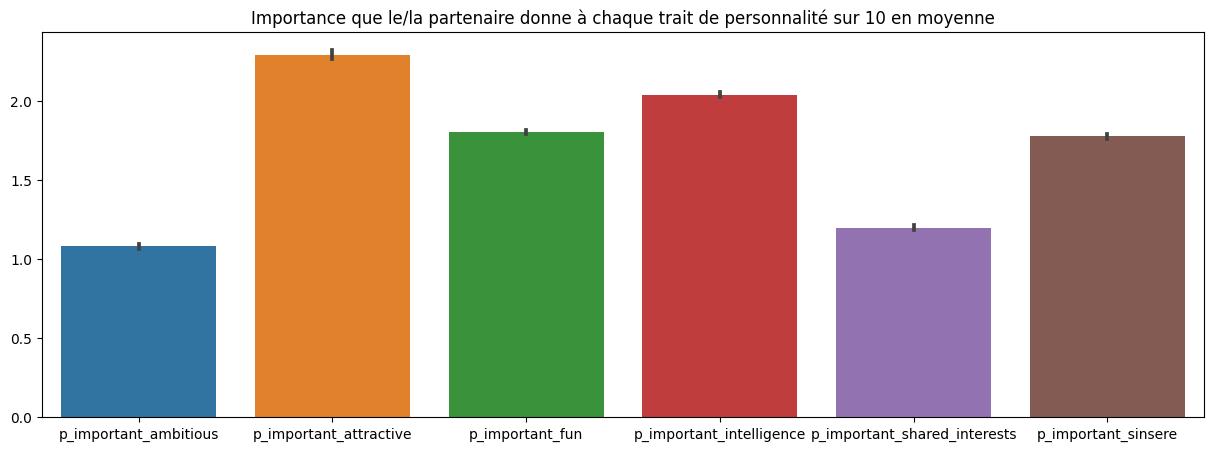

In [54]:
data_important = filter_dataframe_by_substr(DATASET, "p_important_")
plt.figure(figsize=(15,5))
plt.title("Importance que le/la partenaire donne à chaque trait de personnalité sur 10 en moyenne")
sns.barplot(data=data_important )
